# Multiple Linear Regression

## Importing the libraries

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [61]:
dataset = pd.read_csv('50_Startups.csv')
print(dataset)
X = dataset.iloc[:, :-1].values  #independant variable
y = dataset.iloc[:, -1].values   #dependant variable

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

## Encoding categorical data

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#here we specify the transofmer we are doing, ie, encoding, one hot encoding, on the first column. Passthrough says keep all columns.
ct = ColumnTransformer(transformers= [('encoder', OneHotEncoder(), [3] )], remainder ='passthrough')
X = np.array(ct.fit_transform(X)) #we can fit and transform in one go, and assign result to X. Not fit_transform does not return a numpyarray
print("Done")

Done


In [36]:
#No need to apply featyre scaling as the coefficients compensate in multiple linear regression

## Splitting the dataset into the Training set and Test set

In [38]:
from sklearn.model_selection import train_test_split
#specify variables, features, dependant, and size split
#recommend 80% in train, 20% in test. Note, it randomly splits
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state =0)


## Training the Multiple Linear Regression model on the Training set

In [40]:
#note the multiple linear regression class we call, is automaticall dropped by the mlR class, which takes care of dummy variable trap.
#X = X[:,1:] #all rows, drop first column
#print(X)
#This class also does the backward learning process. Will return accuracy
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
#No parameter tuning required
regressor.fit(X_train, y_train) #this does the training too
#this class first avoids dummy variable trap, selects best features based off p values.

LinearRegression()

## Predicting the Test set results

In [46]:
#We have several features, so cannot use a linear plot. Display two vectors, real profit, vs predicted profits of the test set
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1) , y_test.reshape(len(y_test), 1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


[103015.2  132582.28 132447.74  71976.1  178537.48 116161.24  67851.69
  98791.73 113969.44 167921.07]
[103282.38 144259.4  146121.95  77798.83 191050.39 105008.31  81229.06
  97483.56 110352.25 166187.94]


<BarContainer object of 10 artists>

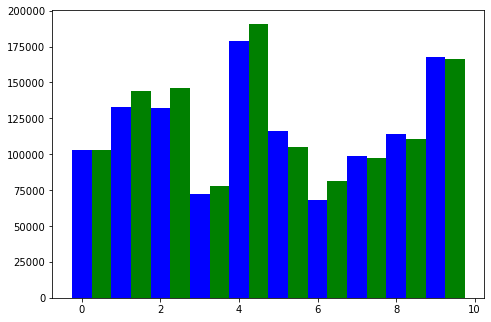

In [57]:
import numpy as np
import matplotlib.pyplot as plt
X = np.arange(10)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
print(y_pred)
print(y_test)
ax.bar(X + 0.00, y_pred, color = 'b', width = 0.5)
ax.bar(X + 0.5, y_test, color = 'g', width = 0.5)

In [71]:
#R&D Spend = 160000, Administration Spend = 130000, Marketing Spend = 300000 and State = California?, profit = ?
print(X_train[1, :])
X_new = [[ 1.0,0.0 ,0.0 ,160000 ,130000 ,300000]]
y_new = regressor.predict(X_new)
print(y_new)
print(regressor.coef_)
print(regressor.intercept_)

[0.0 0.0 1.0 46014.02 85047.44 205517.64]
[181566.92]
[ 8.66e+01 -8.73e+02  7.86e+02  7.73e-01  3.29e-02  3.66e-02]
42467.529248581035
